In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [2]:
df=pd.read_csv("synthetic_coffee_health_10000.csv")
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
print(df.shape)
display(df.columns)

(10000, 16)


Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [5]:
df.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

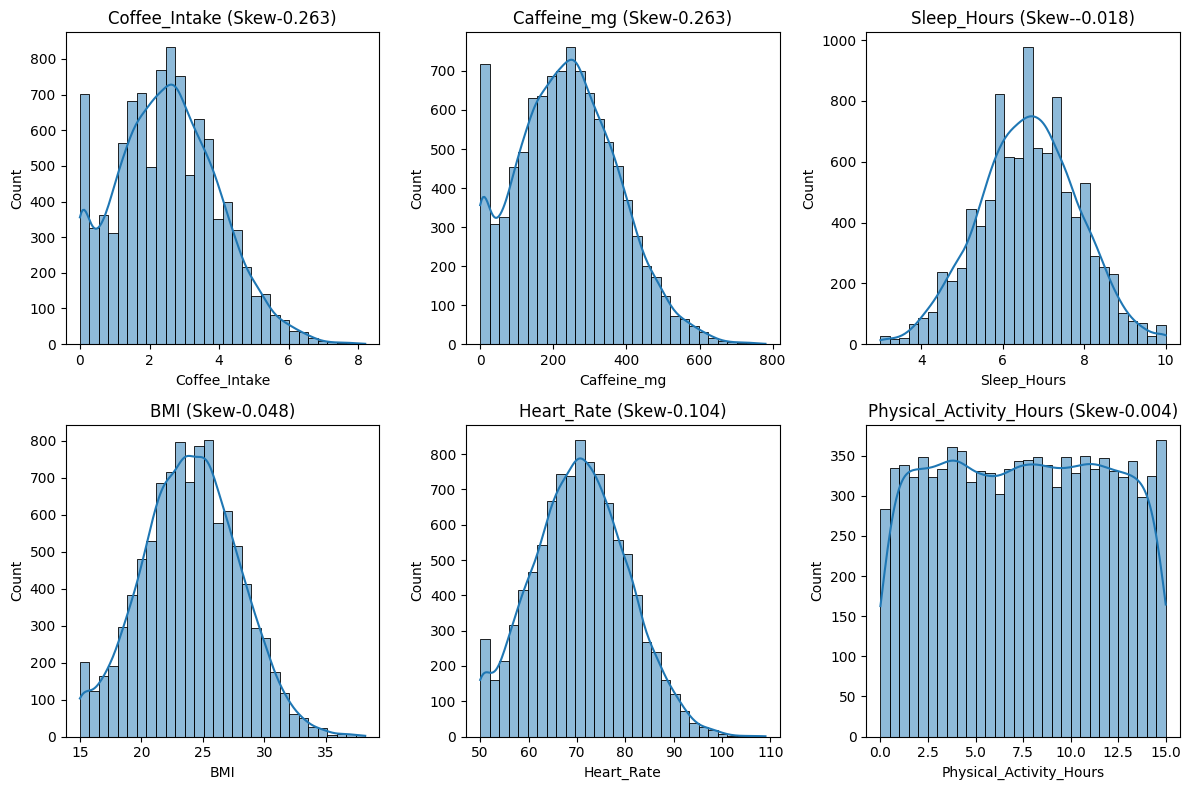

In [6]:
num_cols = ['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
skew_values = df[num_cols].skew()
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} (Skew-{df[col].skew():.3f})")
plt.tight_layout()
plt.show()

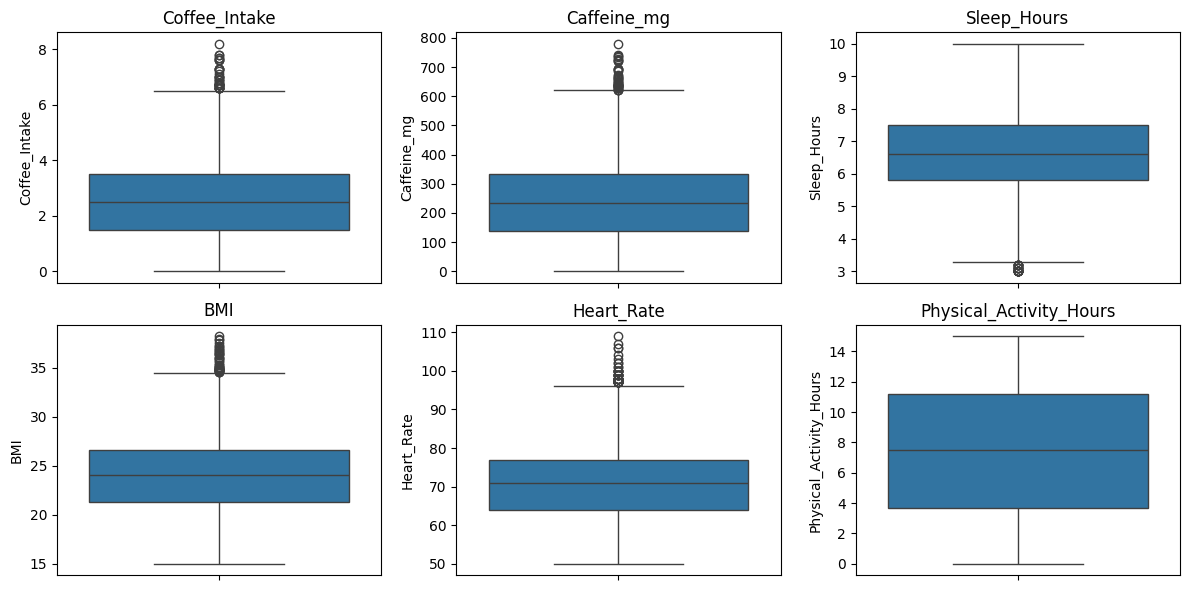

In [7]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

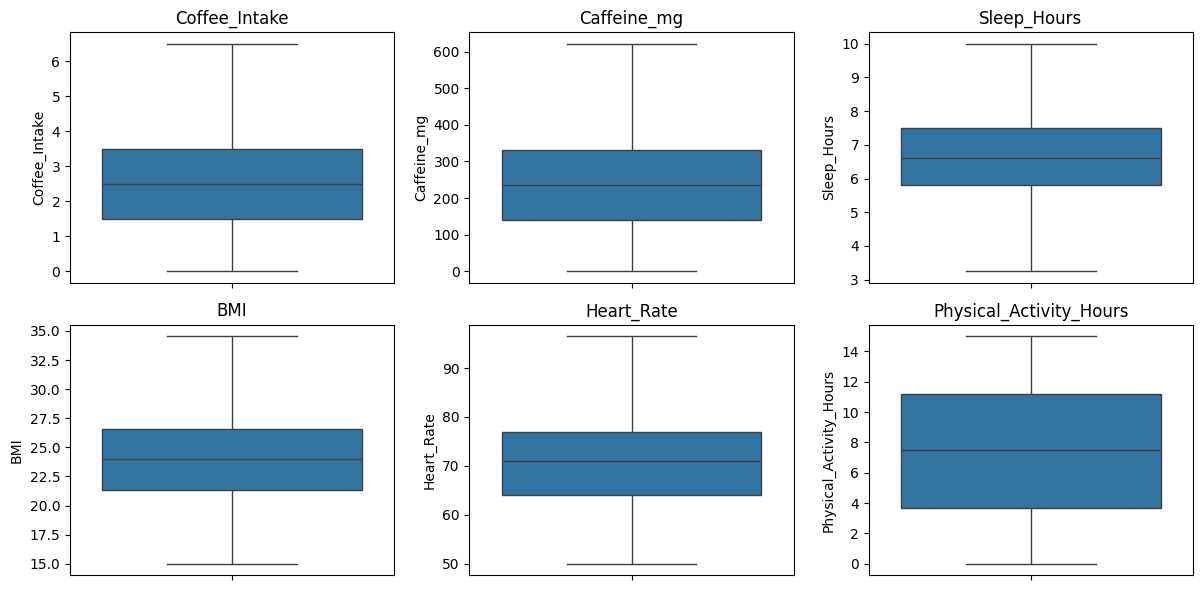

In [8]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [9]:
df['Sleep_Quality'].value_counts()

Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

In [10]:
df['Stress_Level'].value_counts()

Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64

In [11]:
cat_cols = ['Sleep_Quality', 'Stress_Level', 'Smoking', 'Alcohol_Consumption']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  

In [12]:
features = num_cols + cat_cols
X=df[features]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [15]:
print("Explained Variance:",pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", pca.explained_variance_ratio_.sum())

Explained Variance: [2.16497272 1.65762662]
Explained Variance Ratio: [0.21647562 0.16574609]
Total Variance Captured: 0.3822217083109077


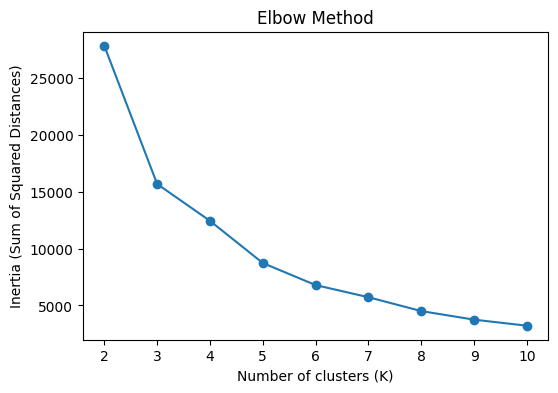

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
K_range = range(2, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method")
plt.show()

In [17]:
sil_scores = []
K_range = range(2, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)
    print(f"K={k}, Silhouette Score={sil:.4f}")

K=2, Silhouette Score=0.4739
K=3, Silhouette Score=0.4115
K=4, Silhouette Score=0.4012
K=5, Silhouette Score=0.4232
K=6, Silhouette Score=0.4484
K=7, Silhouette Score=0.4579
K=8, Silhouette Score=0.4541
K=9, Silhouette Score=0.4571
K=10, Silhouette Score=0.4548


In [31]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster_km'] = kmeans.fit_predict(X_pca)
sil_km = silhouette_score(X_pca, df['cluster_km'])
print(f"Silhouette Score={sil_km:.4f}")

Silhouette Score=0.4739


In [32]:
label_counts_km = df['cluster_km'].value_counts()
print("Cluster label counts:")
print(label_counts_km)

Cluster label counts:
cluster_km
1    9039
0     961
Name: count, dtype: int64


In [36]:
cluster_descriptions = {
    0: "Lower coffee intake, moderate health metrics",
    1: "Higher coffee intake with varying lifestyle and health features"
}
df['Cluster_Description_km'] = df['cluster_km'].map(cluster_descriptions)

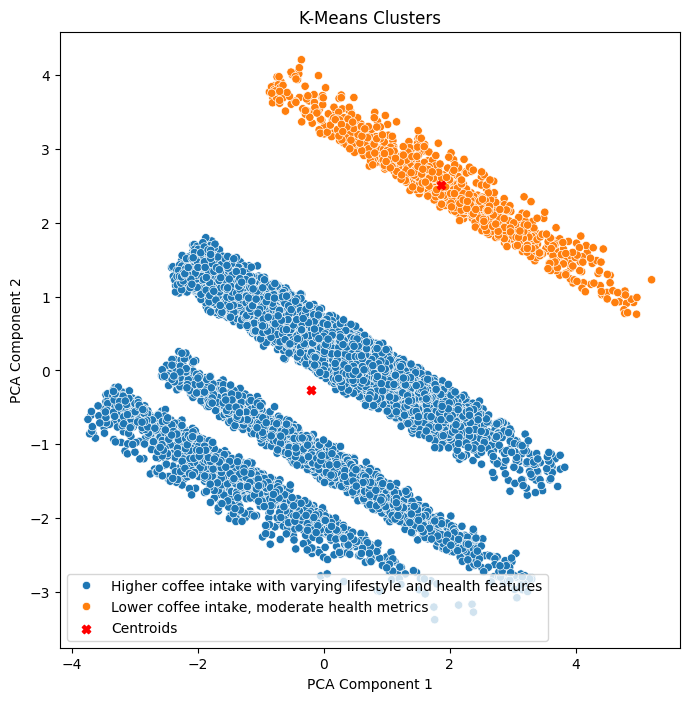

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster_Description_km'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='X',
            label='Centroids')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clusters")
plt.legend()
plt.show()

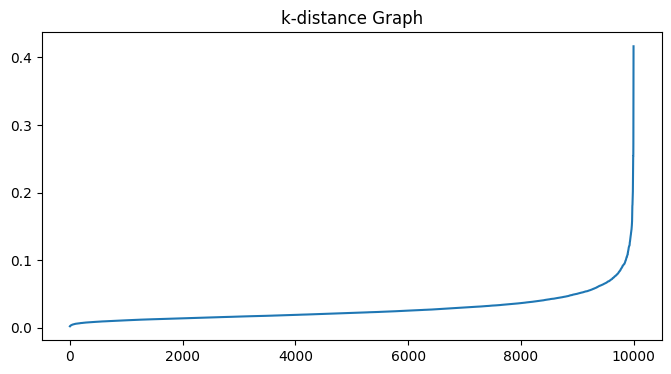

In [22]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title('k-distance Graph')
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.18, min_samples=3)
df['cluster_db'] = dbscan.fit_predict(X_pca)
mask = df['cluster_db'] != -1 
sil_db = silhouette_score(X_pca[mask], df['cluster_db'][mask])
print(f"Silhouette Score={sil_db:.4f}")

Silhouette Score=0.3052


In [44]:
label_counts_db = df['cluster_db'].value_counts()
print("Cluster label counts:")
print(label_counts_db)

Cluster label counts:
cluster_db
 0    5637
 1    2050
 2    1342
 3     957
-1      14
Name: count, dtype: int64


In [45]:
cluster_descriptions = {
    0: "Moderate coffee intake, healthy lifestyle metrics",
    1: "Higher coffee intake, slightly higher BMI & heart rate",
    2: "Low coffee intake, low physical activity",
    3: "High coffee intake, active lifestyle",
   -1: "Outliers / Noise points"
}
df['Cluster_Description_db'] = df['cluster_db'].map(cluster_descriptions)

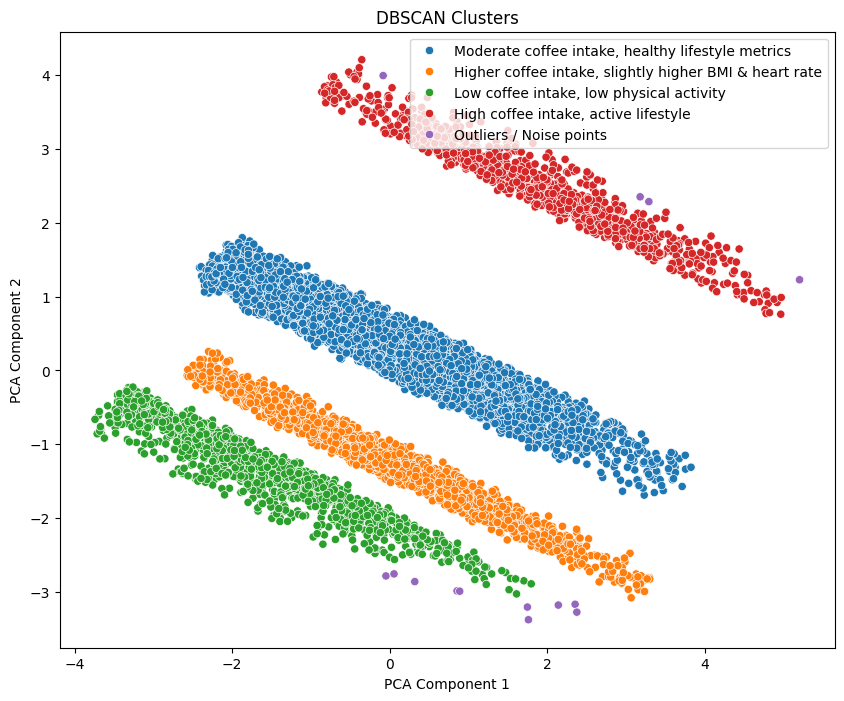

In [52]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster_Description_db'])
plt.title("DBSCAN Clusters")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [27]:
import joblib

joblib.dump(le_dict, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca_model.pkl")
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(dbscan, "dbscan_model.pkl")

['dbscan_model.pkl']